# **Creating an ANN model with a Radial Basis Function layer using the Iris Dataset**

In [ ]:
# Loading Dataset and Preprocessing

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # Labels are converted to one-hot encoding format.
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Dense,Flatten
from tensorflow.keras import backend as K 

import warnings
warnings.filterwarnings("ignore")

iris = load_iris()
X = iris.data
y = iris.target

# One hot encoding
label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.2, random_state=42)

In [ ]:
# Defining a Radial Basis Function Layer

class RBFLayer(Layer) : 
    
    def __init__(self, units, gamma, **kwargs):
        
        """
            
            constructor
            It is necessary to initialize the general properties of the layer.      
        
        """
        
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)
        
    def build(self, input_shape):
        """
            The build method defines the weights of the layer
            This method is automatically called by Keras when the layer receives an input for the first time.
        
        """
        self.mu = self.add_weight(name = "mu",
                                  shape = (int(input_shape[1]), self.units),
                                  initializer = "uniform",
                                  trainable = True)
    
    def call(self, inputs):
        """
        Called during Forward Propagation.
        It takes the input and calculates the output.
        
        """
        
        diff = K.expand_dims(inputs) - self.mu # Adds a dimension to input.
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        
        return res
        
        
    def compute_output_shape(self, input_shape):
        
        return (input_shape[0], self.units)
    

In [12]:
# Building, compiling and training Model

def build_model():
    model = Sequential()
    model.add(Flatten(input_shape = (4,)))
    model.add(RBFLayer(10,0.5))
    model.add(Dense(3, activation="softmax"))
    
    model.compile(optimizer = "adam",
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model


In [ ]:
model = build_model()

history = model.fit(X_train, y_train,
                    epochs = 250,
                    batch_size = 4,
                    validation_split = 0.3,
                    verbose =1)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3572 - loss: 1.2877 - val_accuracy: 0.2222 - val_loss: 1.3328
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4009 - loss: 1.2198 - val_accuracy: 0.2222 - val_loss: 1.2746
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3651 - loss: 1.2208 - val_accuracy: 0.2778 - val_loss: 1.2139
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3482 - loss: 1.1742 - val_accuracy: 0.3889 - val_loss: 1.1651
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5432 - loss: 1.1116 - val_accuracy: 0.2778 - val_loss: 1.1210
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - loss: 1.0659 - val_accuracy: 0.2778 - val_loss: 1.0876
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5785 - loss: 1.0450 - val_accuracy: 0.5000 - val_loss: 1.0537
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 1.0186 - val_accuracy: 0.5833 - v

In [18]:
# Testing

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss : {loss:.4f}, Test Accuracy : {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9667 - loss: 0.1268
Test Loss : 0.1268, Test Accuracy : 0.9667


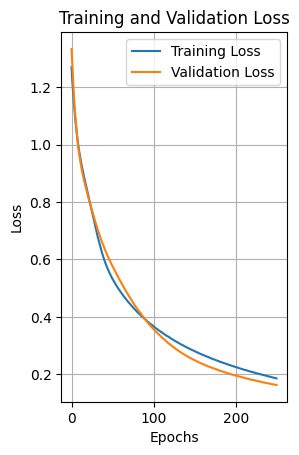

In [19]:
# Visualizing of loss and accuracy

plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

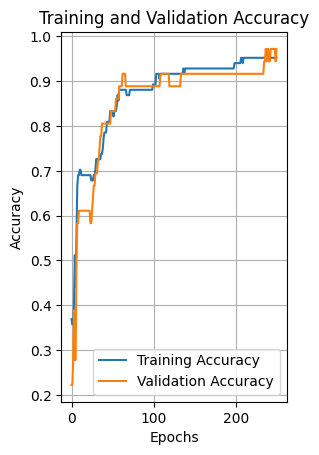

In [20]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()